#CODSOFT DATA SCIENCE INTERNSHIP
#TASK-3:IRIS FLOWER DETECTION
#BY HIMANSHU KUMAR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#libraries for Training/testing,Model selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#for evaluating Model Performance
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report



IMPORTING DATASET

In [ ]:
#read the Iris dataset and show the first 10 rows
df=pd.read_csv("/content/archive (1).zip")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#it gives the last 10 rows of dataset
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Data Analysis

In [ ]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# How much rows and columns in this data
df.shape

(150, 5)

In [ ]:
#Descriptive statistics summary of a given data set
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#count the value of species
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# To find null values in dataset
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Data Visualization

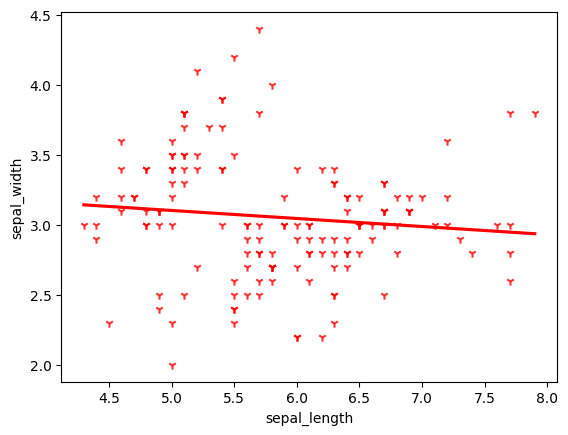

In [ ]:
# prompt: create regplot

import matplotlib.pyplot as plt
sns.regplot(data=df, x=df['sepal_length'],y=df['sepal_width'],ci=None,marker="1",color="red")
plt.show()


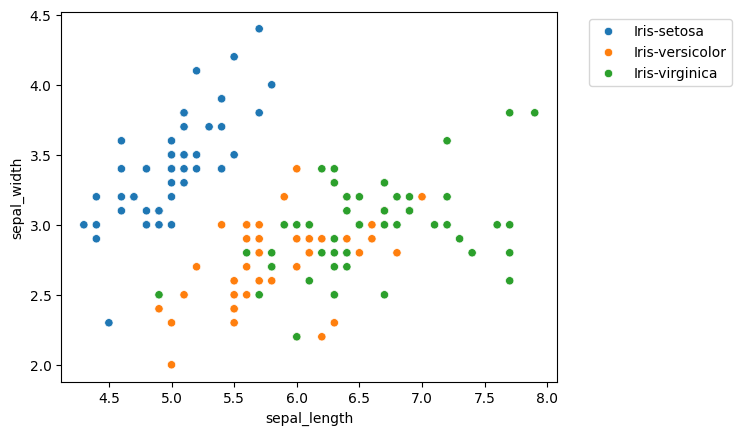

In [ ]:

sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)



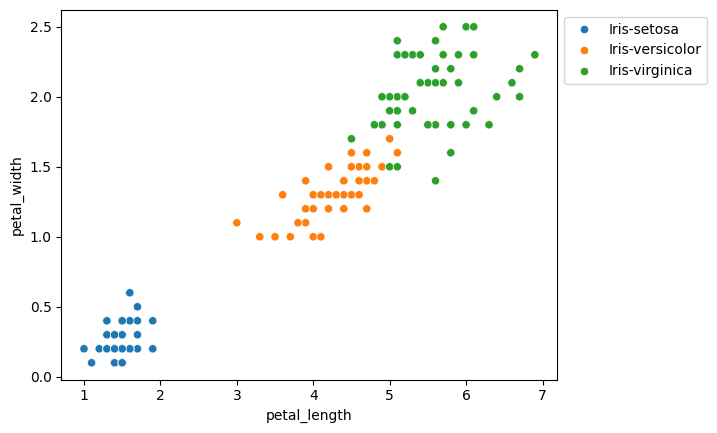

In [ ]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [ ]:
#Data
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


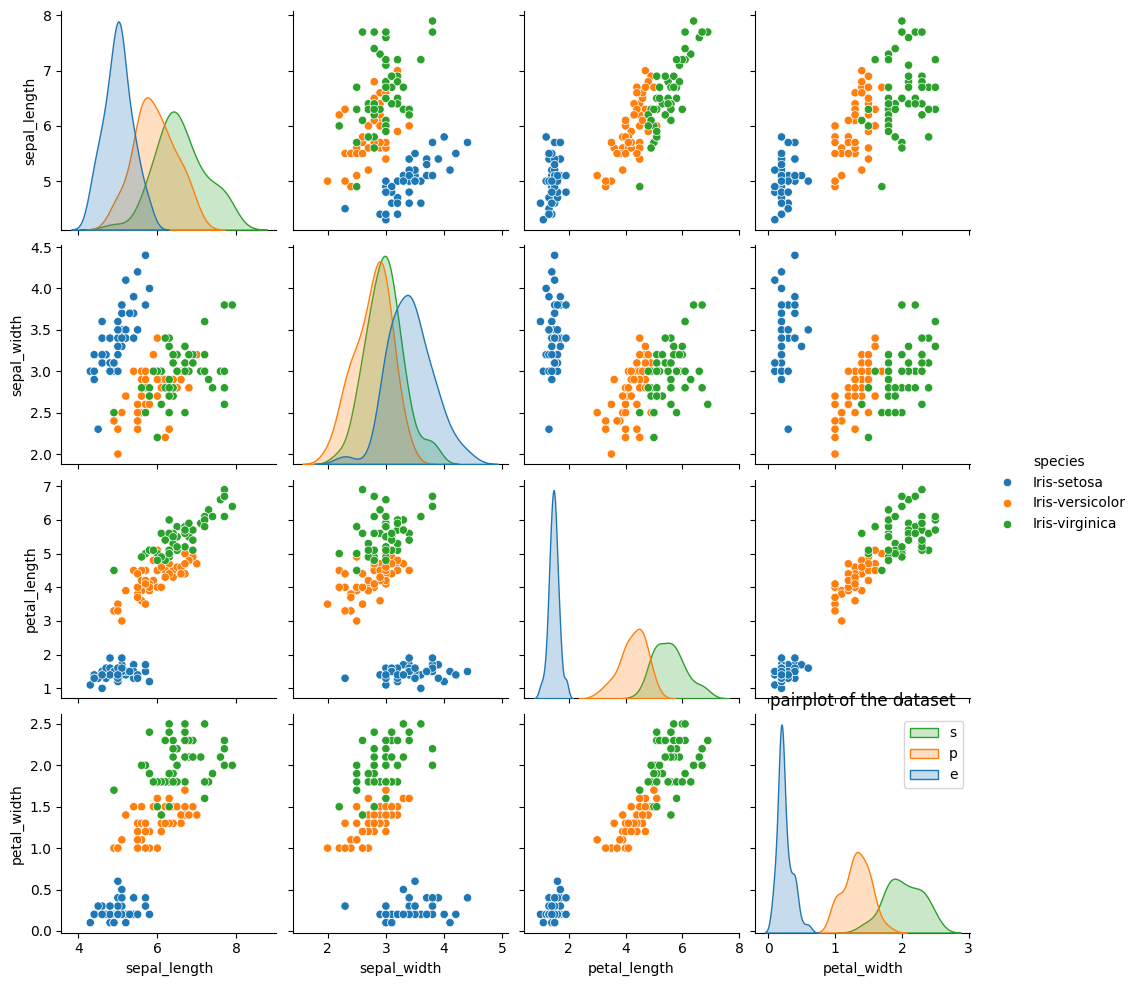

In [ ]:
#Pairplot of the data set
sns.pairplot(df,hue="species",diag_kind='kde')
plt.title("pairplot of the dataset")
plt.legend("species")

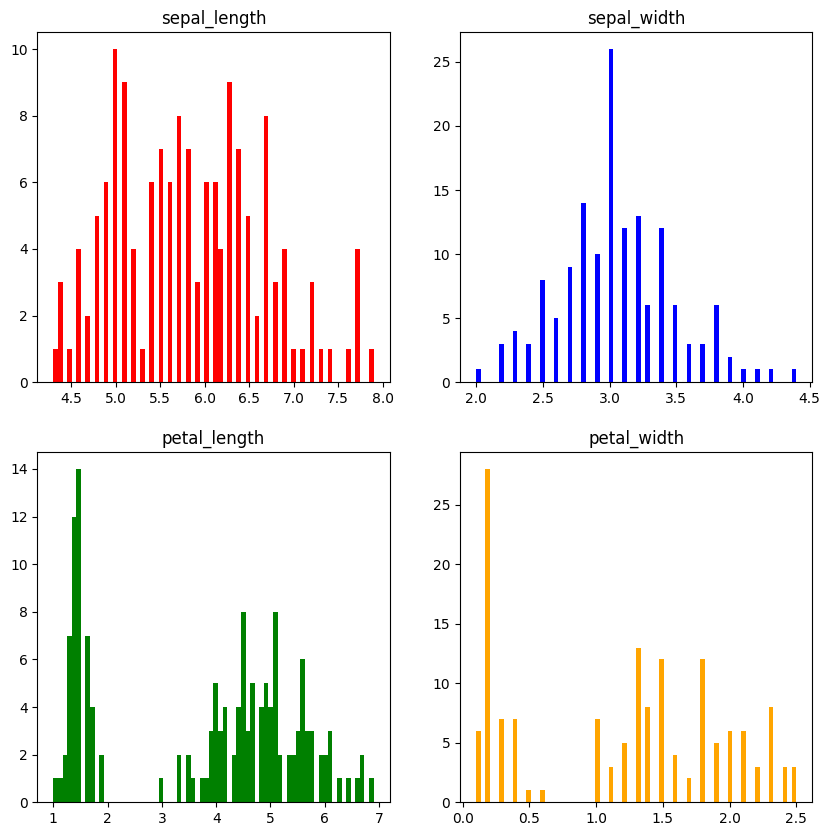

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].set_title("sepal_length")
ax[0,0].hist(df['sepal_length'],bins=70,color="red")
ax[0,1].set_title("sepal_width")
ax[0,1].hist(df['sepal_width'],bins=70,color="blue")
ax[1,0].set_title("petal_length")
ax[1,0].hist(df['petal_length'],bins=70,color="green")
ax[1,1].set_title("petal_width")
ax[1,1].hist(df['petal_width'],bins=70,color="orange")
plt.show()

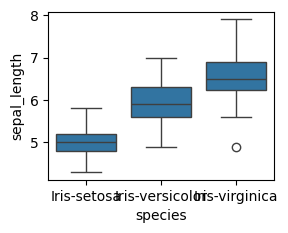

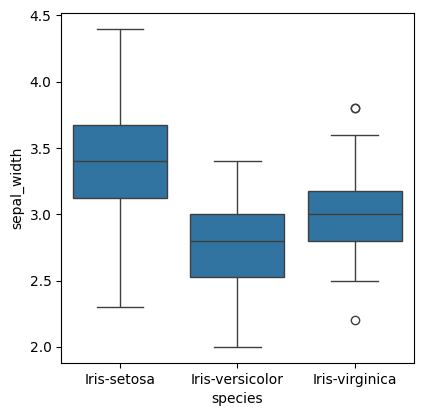

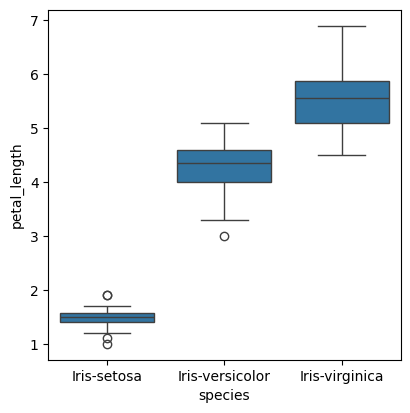

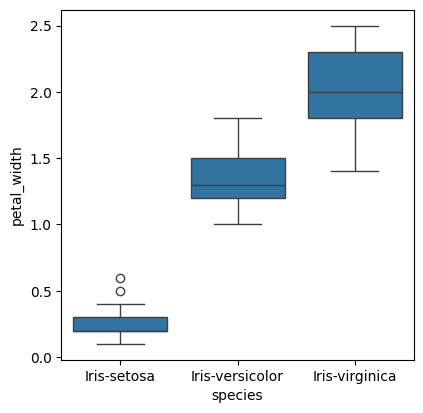

<Figure size 1000x1000 with 0 Axes>

In [ ]:


import matplotlib.pyplot as plt
def graph(y):
  sns.boxplot(x=df['species'],y=y,data=df)
  plt.figure(figsize=(10,10))



plt.subplot(221)
graph("sepal_length")
plt.subplot(222)
graph("sepal_width")
plt.subplot(223)
graph("petal_length")
plt.subplot(224)
graph("petal_width")

plt.show()


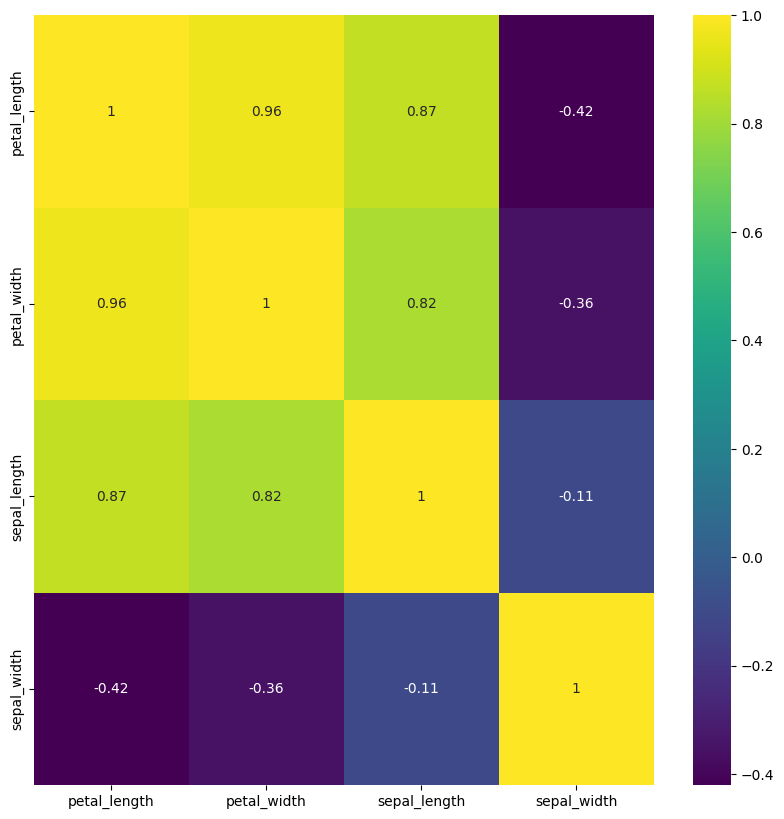

In [ ]:
plt.figure(figsize=(10,10))
corr=df[['petal_length','petal_width','sepal_length','sepal_width']].corr()
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

In [ ]:
df['species'].unique()



array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Apply Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# we define a empty list
wcss1 = []
#i.e. with in cluster sum of square
for i in range(1,11):
  Kmeans= KMeans(n_clusters=i,random_state=42)
  Kmeans.fit(df[['petal_length','petal_width']])
  wcss1.append(Kmeans.inertia_)


In [ ]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

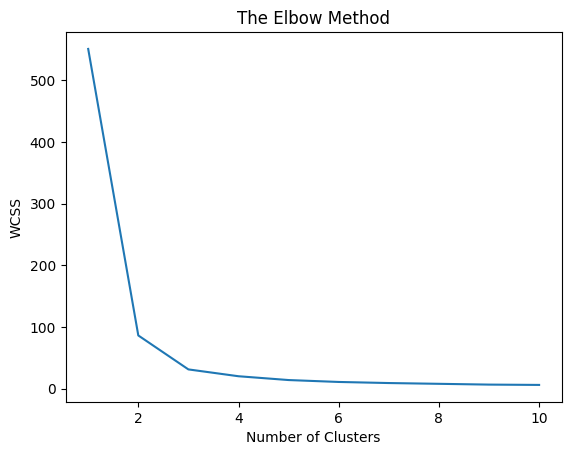

In [ ]:
#Plotting the elbow curve
plt.plot(range(1,11),wcss1)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans1=KMeans(n_clusters=4,random_state=2)
y_pred=kmeans1.fit_predict(df[['petal_length','petal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
data_with_cluster1=df.copy()
#we create a new columns and we define the cluster in the column with respect to petal
data_with_cluster1['cluster1']=y_pred
data_with_cluster1

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


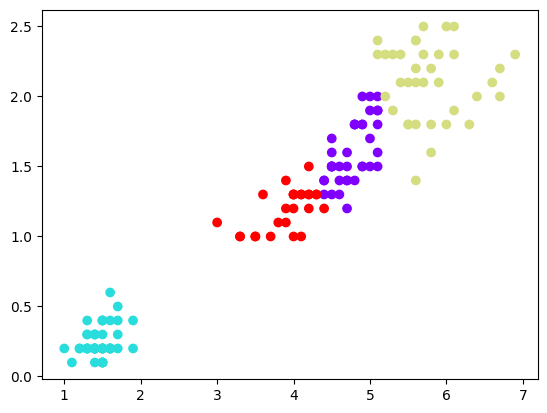

In [ ]:
plt.scatter(data_with_cluster1['petal_length'],data_with_cluster1['petal_width'],c=data_with_cluster1['cluster1'],cmap='rainbow')
plt.show()

In [ ]:
centroids=kmeans1.cluster_centers_
centroids

array([[4.75789474, 1.59736842],
       [1.464     , 0.244     ],
       [5.78611111, 2.10833333],
       [3.90384615, 1.19230769]])

In [ ]:
data_with_cluster1['species']=data_with_cluster1['species'].map({'Iris_setosa':0,'Iris_versicolor':1,'Iris_virginica':2})


In [ ]:
wcss2 = []

for i in range(1,11):
  Kmeans= KMeans(n_clusters=i,random_state=42)
  Kmeans.fit(df[['sepal_length','sepal_width']])
  wcss2.append(Kmeans.inertia_)




In [ ]:
wcss2

[130.18093333333334,
 57.99647879763822,
 37.1237021276596,
 28.509571540860733,
 24.286968292640555,
 17.516112899896804,
 14.628929179122284,
 15.347787887730345,
 12.659354830449459,
 12.055797831892459]

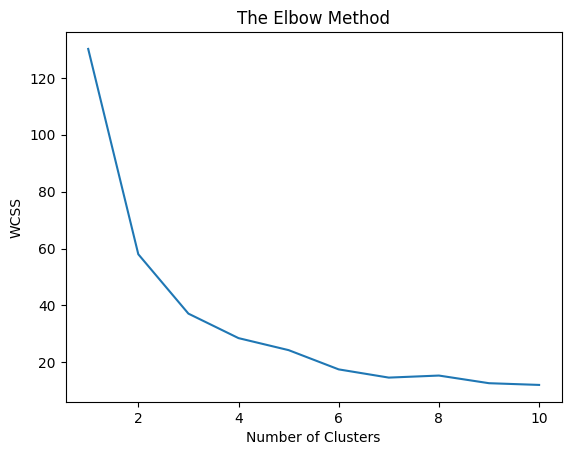

In [ ]:
#Plotting the elbow curve
plt.plot(range(1,11),wcss2)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans2=KMeans(n_clusters=3,random_state=2)
y_pred1=kmeans2.fit_predict(df[['sepal_length','sepal_width']])
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
data_with_cluster2=df.copy()
data_with_cluster2['cluster2']=y_pred1 #We create a new columns and we define the cluster in the column with respect to sepal
data_with_cluster2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster2
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


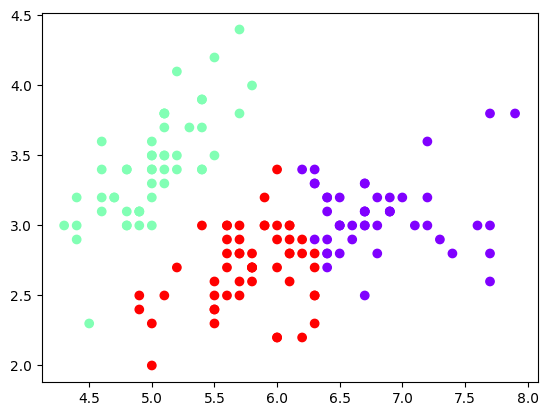

In [ ]:
plt.scatter(data_with_cluster2['sepal_length'],data_with_cluster2['sepal_width'],c=data_with_cluster2['cluster2'],cmap='rainbow')
plt.show()